# Funzioni Utili e import

In [6]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pydicom

def couple_images_and_labels(img, truth):
    dicom_coupled = []
    for img_path in img:
        truth_paths = list(filter(lambda x: x.startswith(img_path), truth))
        if len(truth_paths) != 0:
            dicom_coupled.append((img_path, truth_paths))
        else:
            print('this have not truth: ', img_path)
    return dicom_coupled

def image_shape(img_dir_path):
    img = get_image_from_dir(img_dir_path)
    return (len(img), len(img[0]))

def show_images(img_dir_path, truth_dir_paths, tilte):
    img = get_image_from_dir(img_dir_path)
    label = get_image_from_dirs(truth_dir_paths)
    f, axarr = plt.subplots(1, 3)
    f.set_size_inches(18.5, 10.5)
    axarr[0].imshow(img, cmap=plt.cm.bone)
    axarr[1].imshow(img, cmap=plt.cm.bone)
    axarr[1].imshow(label, cmap="Blues", alpha=0.5)
    axarr[2].imshow(label, cmap=plt.cm.bone)
    plt.suptitle('%s: %s (shape %s)' % (tilte, img_dir_path, str(img.shape)))
    figManager = plt.get_current_fig_manager()
    figManager.full_screen_toggle()
    plt.show()

def show_hist(img_dir_path, truth_dir_paths, tilte):
    img = get_image_from_dir(img_dir_path)
    label = get_image_from_dirs(truth_dir_paths)
    f, axarr = plt.subplots(1, 2)
    f.set_size_inches(18.5, 10.5)
    axarr[0].hist(img)
    axarr[0].set_title('Image')
    axarr[1].hist(label)
    axarr[1].set_title('Label')
    plt.suptitle('%s: %s' % (tilte, img_dir_path))
    figManager = plt.get_current_fig_manager()
    figManager.full_screen_toggle()
    plt.show()
    
def walk_in_folder_for_dcm(folder_path):
    path = folder_path
    while os.path.isdir(path):
        files = os.listdir(path)
        files.sort(reverse=True)
        file = files[0]
        path = os.path.join(path, file)
    return path


def walk_in_folder_for_dcms(folder_path):
    path = folder_path
    while len(os.listdir(path)) == 1:
        files = os.listdir(path)
        files.sort(reverse=True)
        folder = files[0]
        path = os.path.join(path, folder)
    for file in os.listdir(path):
        new_path = os.path.join(path, file)
        if max_val(255, new_path):
            path = os.path.join(path, file)
            break
    return path


def get_image_from_dir(img_dir_path):
    dicom_path = walk_in_folder_for_dcm(os.path.join(DATSET_PATH, img_dir_path))
    dicom = pydicom.dcmread(dicom_path)
    img = dicom.pixel_array
    return img


def get_image_from_dirs(img_dir_path):
    img_full = None
    for dir in img_dir_path:
        dicom_path = walk_in_folder_for_dcms(os.path.join(DATSET_PATH, dir))
        dicom = pydicom.dcmread(dicom_path)
        if img_full is None:
            img_full = dicom.pixel_array
        else:
            img_full = img_full | dicom.pixel_array
    return img_full


def max_val(val, path):
    dicom = pydicom.dcmread(path)
    max = np.amax(dicom.pixel_array)
    return max == val

# Dataset

In [2]:
DATSET_PATH = '/home/mint/Scrivania/Tesi/mammografieScript/mammografieScript'

files = os.listdir(DATSET_PATH)
train_dicom_path = list(filter(lambda x: 'Training' in x, files))
train_truth = list(filter(lambda x: x[-1].isdigit(), train_dicom_path))
train_img = list(filter(lambda x: not x[-1].isdigit(), train_dicom_path))

train_dicom_coupled = couple_images_and_labels(train_img, train_truth)

# Caso tumore multiplo

(4440, 3072)


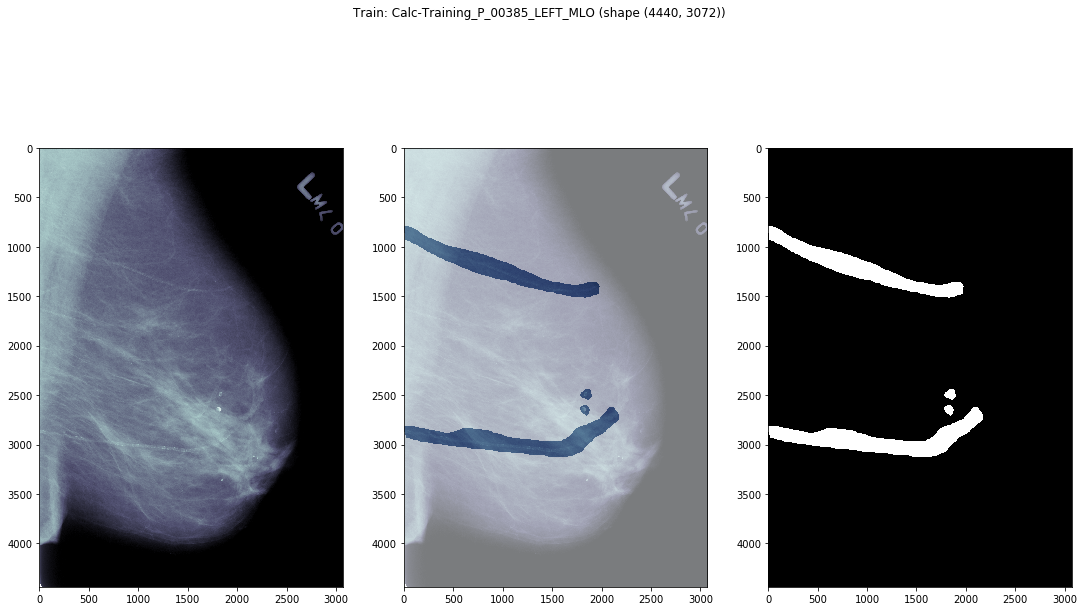

In [7]:
name = 'Calc-Training_P_00385_LEFT_MLO'
for img_dir_path, truth_dir_path in train_dicom_coupled:
    if img_dir_path == name:
        print(image_shape(img_dir_path))
        show_images(img_dir_path, truth_dir_path, 'Train')

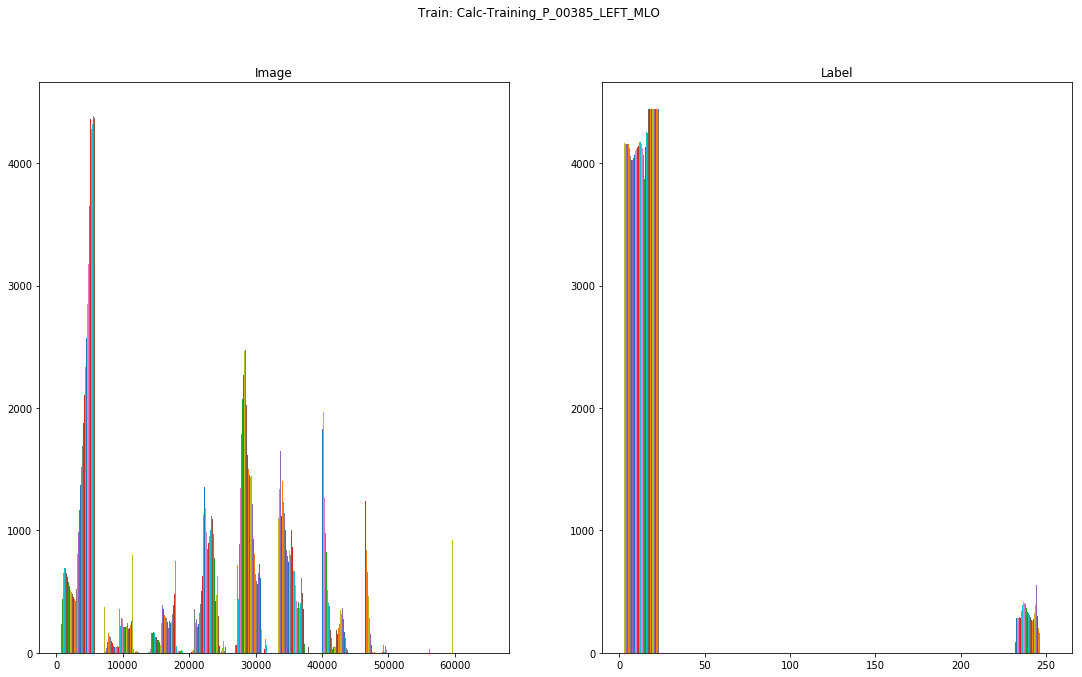

In [6]:
# è lento calcolare gli istogrammi
for img_dir_path, truth_dir_paths in train_dicom_coupled:
    if img_dir_path == name:
        show_hist(img_dir_path, truth_dir_paths, 'Train')

# Caso con valori superiori al 255

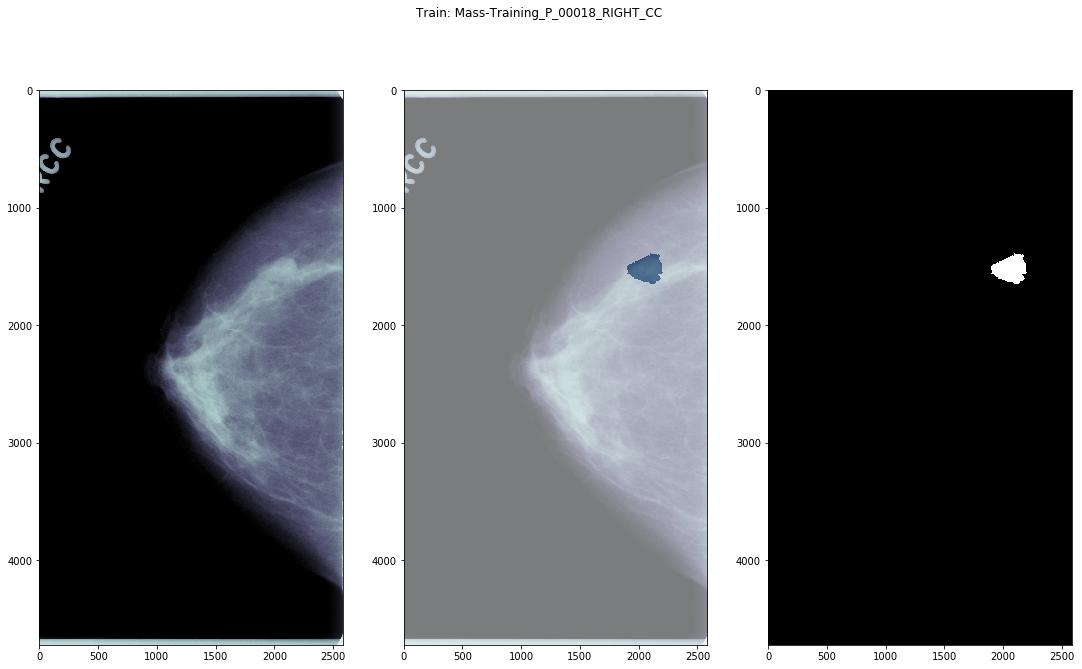

In [5]:
name = 'Mass-Training_P_00018_RIGHT_CC'
for img_dir_path, truth_dir_path in train_dicom_coupled:
    if img_dir_path == name:
        show_images(img_dir_path, truth_dir_path, 'Train')

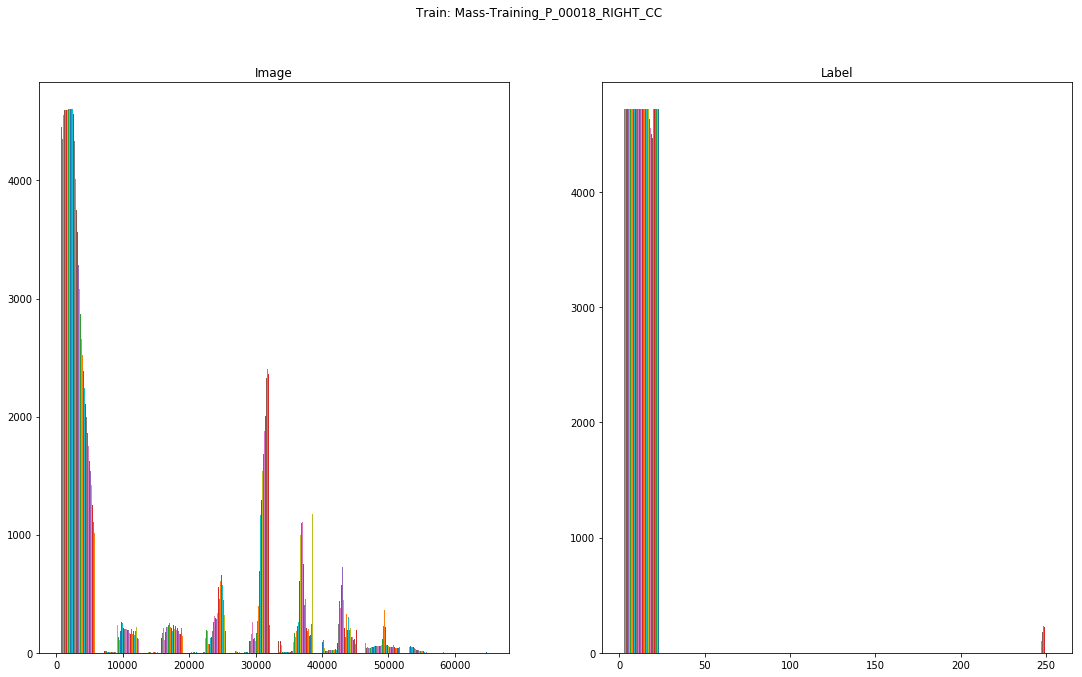

In [6]:
# è lento calcolare gli istogrammi
for img_dir_path, truth_dir_paths in train_dicom_coupled:
    if img_dir_path == name:
        show_hist(img_dir_path, truth_dir_paths, 'Train')